## Breast Cancer Survival prediction.
Using machine learning to predict rate of survival in breast cancer patients.
Inspired by [Aman Kharwal blog](https://thecleverprogrammer.com/2022/03/08/breast-cancer-survival-prediction-with-machine-learning/)

Apply multiple algorithms and test their predictions.

In [123]:
#load libraries
import numpy as np
import pandas as pd
import plotly.express as plty
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Get to load the dataset

In [141]:
data  = pd.read_csv("./data/breast_cancer_data.txt")
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [125]:
data.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


Check for nulls. Two variables contain null status

In [126]:

data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [127]:
data = data.dropna() #remove rows containing NAs
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


## Exploratory Analysis

Surgery type

In [128]:
stage = data["Surgery_type"].value_counts()
transactions = stage.index
quantity = stage.values

figure = plty.pie(data,values=quantity,
                        names = transactions,hole=0.5,
                        title = "surgery_types")

figure.show()
#majority of patients are in stage II cancer.

Explore ER status, PR status, HER2 status

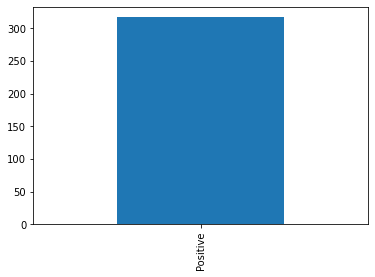

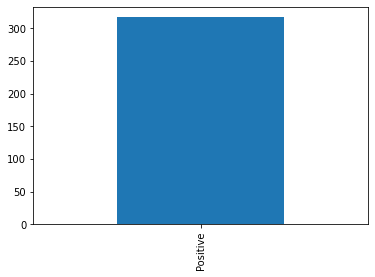

<AxesSubplot:>

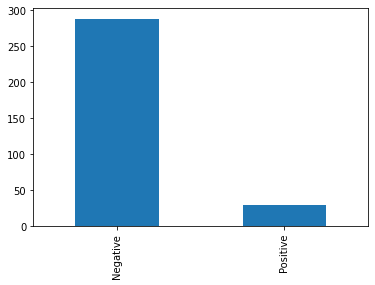

In [129]:

data["ER status"].value_counts().plot(kind="bar")
plt.show()
data["PR status"].value_counts().plot(kind="bar")
plt.show()
data["HER2 status"].value_counts().plot(kind="bar")

Patient Status

<AxesSubplot:>

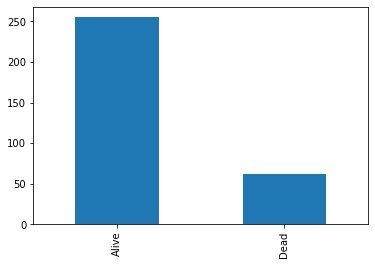

In [130]:
data["Patient_Status"].value_counts().plot(kind = 'bar')
#Majority of the patients survived the disease

<AxesSubplot:>

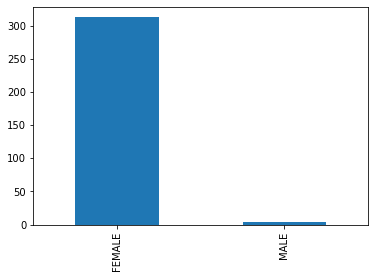

In [131]:
#Gender

data["Gender"].value_counts().plot(kind="bar")

Stage of tumor of patiens

In [132]:
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = plty.pie(data,values =quantity,
                        names = transactions,hole=0.5,
                        title = "tumor stages for patients")

figure.show()
#majority of patients are in stage II cancer.

Patient Histology - Histology is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread

In [133]:
stage = data["Histology"].value_counts()
transactions = stage.index
quantity = stage.values

figure = plty.pie(data,values=quantity,
                        names = transactions,hole=0.5,
                        title = "histology for patients")

figure.show()

#majority of patients are within the infiltrating ductal carcinoma level.

In [155]:
data_copy = data
def bar_chart(feature):
    Alive = data_copy[data_copy["Patient_Status"] == "Alive"][feature].value_counts()
    dead = data_copy[data_copy["Patient_Status"] == "Dead"][feature].value_counts()
    df_new = pd.DataFrame([Alive, dead])
    df_new.index = ["Alive","dead"] #create column name
    df_new.plot(kind="bar", stacked=True, figsize = (10,5))

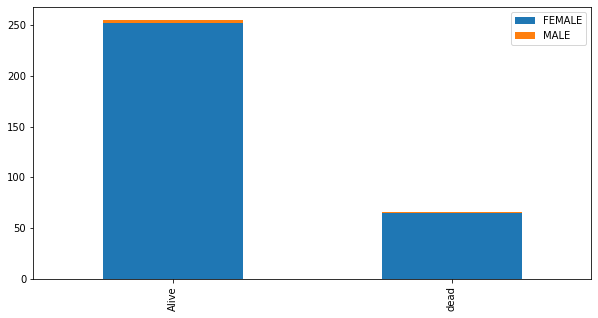

In [161]:
bar_chart("Gender")

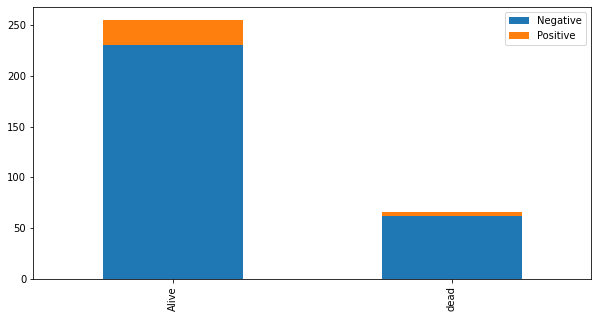

In [159]:
bar_chart("HER2 status")

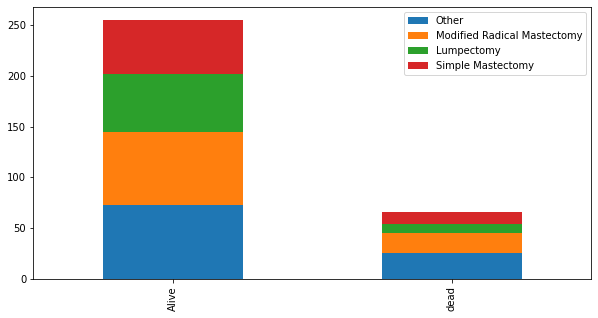

In [164]:
bar_chart("Surgery_type")

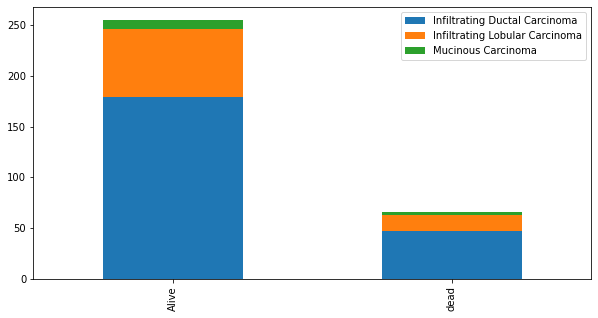

In [165]:
bar_chart("Histology")

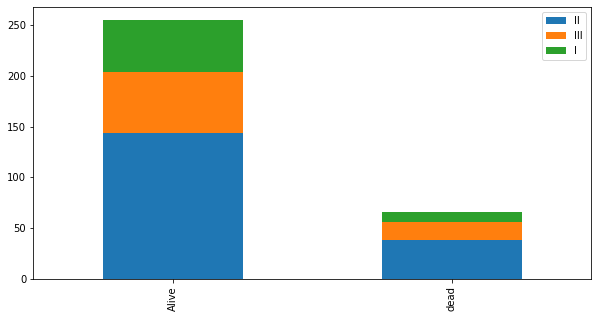

In [166]:
bar_chart("Tumour_Stage")

### Transform Data from categorical to machine readable form

In [163]:
data_copy.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [135]:
#data.Tumour_Stage.value_counts()
#data  = pd.read_csv("./data/breast_cancer_data.txt")
data.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [137]:

def data_convert(data):
    data["Gender"] = data["Gender"].map({"FEMALE":1, "MALE":2})
    data["Tumour_Stage"] = data["Tumour_Stage"].map({"I":1, "II":2,"III":3})
    data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma":1, 
                                                "Mucinous Carcinoma":2,
                                                "Infiltrating Lobular Carcinoma":3})
                                                
    data["ER status"] = data["ER status"].map({"Positive":1})
    data["PR status"] = data["PR status"].map({"Positive":1})
    data["HER2 status"] = data["HER2 status"].map({"Positive":1,"Negative":2})
    data["Surgery_type"] = data["Surgery_type"].map({ "Modified Radical Mastectomy":1,
                                                    "Lumpectomy":2,"Simple Mastectomy":3,"Other":4})

    return data

data_convert(data)
        

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,1,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,1,-0.420320,0.57807,0.61447,-0.031505,2,2,1,1,2,2,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,4,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,1,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,4,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,1,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,1,3,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44,2,0.732720,1.11170,-0.26952,-0.354920,2,3,1,1,2,4,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61,1,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,2,2,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,1,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,1,2,21-Nov-19,19-Feb-21,Dead


Create training and testing datasets. Patient_ID, Date_of_Surgery and Date_of_last_visit have no effect on prediction. So lets drop them

In [ ]:
X = np.array(data.drop(["Patient_Status","Patient_ID","Date_of_Surgery",
                            "Date_of_Last_Visit"],
                            axis='columns'))
Y = np.array(data[["Patient_Status"]])

In [ ]:
print(Y.shape)
print(X.shape)

(317, 1)
(317, 12)


In [ ]:
#split data to testing and validation.
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.10, random_state=42)

Train models


In [173]:

def run_models(xtrain,ytrain):
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=400)
    lr.fit(xtrain,ytrain.ravel())
    lr.predict(xtest)
    accuracy_lr = lr.score(xtest,ytest)

    #SUpport vector machine
    from sklearn.svm import SVC #support vector machine
    svc = SVC()
    svc.fit(xtrain,ytrain.ravel())
    svc.predict(xtest)
    accuracy_svc = svc.score(xtest,ytest)

    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier()
    dt.fit(xtrain,ytrain)
    dt.predict(xtest)
    accuracy_dt = dt.score(xtest,ytest)

    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    rf.fit(xtrain,ytrain.ravel())
    rf.predict(xtest)
    rf_accuracy = rf.score(xtest,ytest)

    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(xtrain,ytrain.ravel())
    nb.predict(xtest)
    nb_accuracy = nb.score(xtest,ytest)


    accuracy = pd.DataFrame([[accuracy_lr, rf_accuracy,nb_accuracy,accuracy_dt,accuracy_svc]],
                        columns = ["Logistic Regression","Random Forest","Naive Bayes","Decision Tree", "SVM"]
                        )
    return accuracy

run_models(xtrain,ytrain)

,Logistic Regression,Random Forest,Naive Bayes,Decision Tree,SVM
0,0.8125,0.84375,0.78125,0.625,0.8125


<AxesSubplot:>

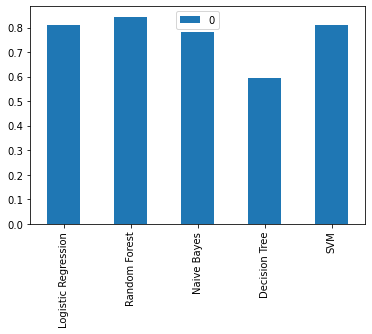

In [174]:
accuracy.T.plot(kind="bar")

Random Forest best model for predicting.
ROC
Feature selection using PCA,lasso, voting classifier etc

C